In [89]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)

In [24]:
accuracy_train = []
accuracy_test = []


for i in range (1,9):
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    accuracy_train.append(knn.score(X_train,y_train))    
    accuracy_test.append(knn.score(X_test,y_test))
print(accuracy_train)   
print(accuracy_test)   

[1.0, 0.9916492693110647, 0.9937369519832986, 0.9909533750869868, 0.9916492693110647, 0.9895615866388309, 0.9902574808629089, 0.9874739039665971]
[0.9833333333333333, 0.9833333333333333, 0.9861111111111112, 0.9916666666666667, 0.9888888888888889, 0.9888888888888889, 0.9861111111111112, 0.9805555555555555]


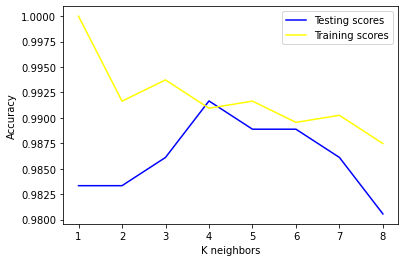

In [28]:
plt.plot(range(1,9),accuracy_test, color = 'blue',label = "Testing scores")       
plt.plot(range(1,9),accuracy_train, color = 'yellow',label = "Training scores") 
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the chart we can see that the training set has the accuracy more or less reducing the more number of neighbors. For the testing set, the accuracy reaches the highest point with 4 neighbors, with a still high value of accuracy for both testing and training set, close to 0.99. For this reason, the best k is 4.

In [43]:
# SVM model
algorithm = ["linear","rbf", "poly","sigmoid"]

for i in algorithm:
    if i == "linear":
        print("Linear function")
    elif i == "rbf":
        print("Radial Basis Function")
    elif i == "poly":
        print("Polynomial function")
    elif i == "sigmoid":
        print("Sigmoid function")

    svm = SVC(C=1.0, class_weight = None, coef0=0.0, decision_function_shape = 'ovr',degree = 3, gamma='auto', kernel = i,
         max_iter = -1,probability = False, random_state = None)
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    print(classification_report(y_test, y_pred))

Linear function
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.98        29
           2       0.98      1.00      0.99        46
           3       1.00      0.93      0.96        29
           4       0.95      1.00      0.98        40
           5       0.97      0.97      0.97        39
           6       1.00      1.00      1.00        34
           7       1.00      0.95      0.98        43
           8       0.97      0.92      0.94        37
           9       0.90      1.00      0.95        26

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.97       360

Radial Basis Function
              precision    recall  f1-score   support

           0       1.00      0.49      0.65        37
           1       1.00      0.41      0.59        29
           2       1.00      0.09      0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the report it is possible so see that either the linear and the polinomial function have a high level of F1 score (combination of precision and recall) and accurary, although the polynomial function has higher level than the linear function. Hence, the use of polynomial is recommended for the dataset and parameters.

Text(33.0, 0.5, 'Actual set')

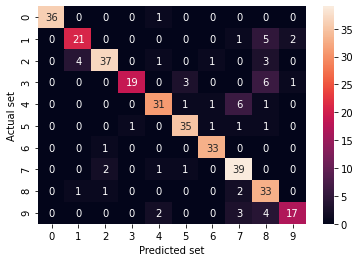

In [40]:
#Confusion matrix using Naive-Bayes

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_pred), annot = True) # order of y and x
plt.xlabel("Predicted set")
plt.ylabel("Actual set")


It can be seen from the confusion matrix that the model predicted well the set. The model got more errors predicting the number 8, in which a few of the predicted 8 were actually other numbers (1,3,9,2) and the number 7 (4,9,8).

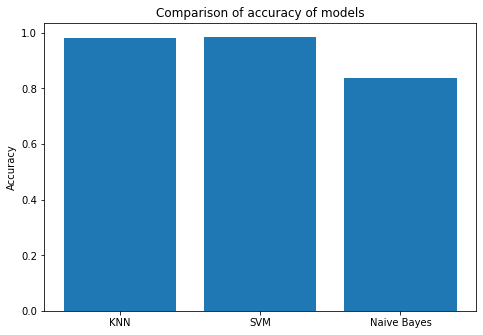

In [47]:
# Comparison of accuracy of models
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ["KNN", "SVM", "Naive Bayes"]
# Running again SVM with polynomial function
svm = SVC(C=1.0, class_weight = None, coef0=0.0, decision_function_shape = 'ovr',degree = 3, gamma='auto', kernel = "poly",
         max_iter = -1,probability = False, random_state = None)
svm.fit(X_train,y_train)


scores = [knn.score(X_test, y_test),svm.score(X_test, y_test),nb.score(X_test, y_test)]

ax.bar(models,scores)
plt.ylabel("Accuracy")
plt.title("Comparison of accuracy of models")
plt.show()

<AxesSubplot:>

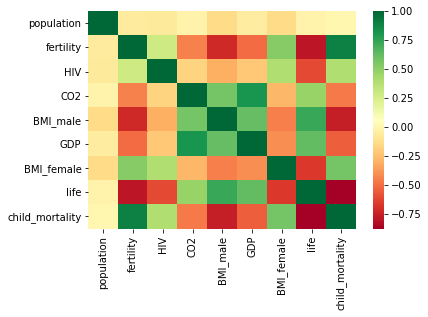

In [48]:
# Gapminder fertility correlation
gm = pd.read_csv("gapminder.csv")
sns.heatmap(gm.corr(), cmap="RdYlGn")

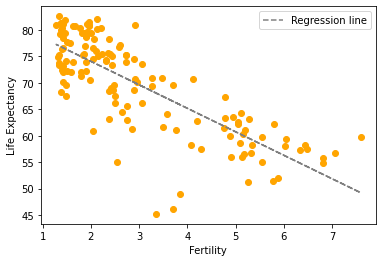

In [59]:
# Linear Regression using one variable
x = gm[["fertility"]]
y = gm["life"]
lr = LinearRegression()
lr.fit(x,y)

plt.plot(x,y,"bo",color = "orange")
plt.plot(x,lr.predict(x), '--', color = "gray", label = "Regression line")
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()

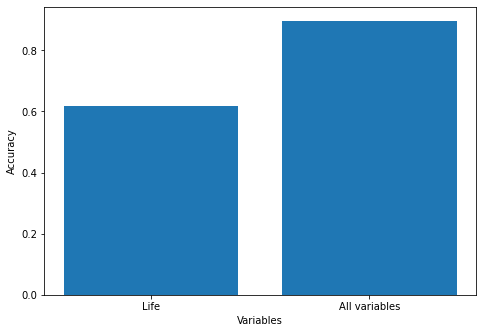

In [73]:
# Linear Regression using all variables
x_all=gm[["population", "child_mortality", "fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female"]]
lr_all = LinearRegression()
lr_all.fit(x_all,y)

accuracy = []
accuracy.append(lr.score(x,y))    
accuracy.append(lr_all.score(x_all,y))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
variables = ["Life", "All variables"]
ax.bar(variables,accuracy)     
plt.xlabel("Variables")
plt.ylabel("Accuracy")

plt.show()

The accuracy using all the variables is clearly higher than using only one variable to predict fertility

In [74]:
# cross-validation
print(cross_val_score(lr,x,y))
print(cross_val_score(lr_all,x_all,y))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In all the 5 parts in which the set was divided, the accuracy result is consistent that using all variables is better than using only life variable to predict fertility.

In [75]:
#Logistic regression
df = pd.read_csv("creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

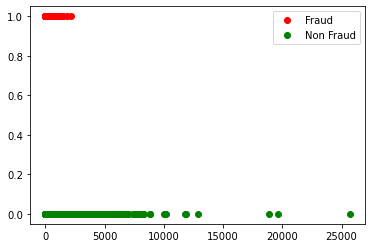

In [78]:
frauds = df.loc[df["Class"] ==1]
non_frauds = df.loc[df["Class"] ==0]

plt.plot(frauds["Amount"],frauds["Class"],"o",color = "red", label = "Fraud")
plt.plot(non_frauds["Amount"],non_frauds["Class"],"o",color = "green", label = "Non Fraud")
plt.legend()
plt.show()

The cases when fraud exist are concentrated in amounts varying from 0 to $2500 aproximately.

In [83]:
x = df.drop("Class", axis = 1)
y = df["Class"]
lr = LogisticRegression()

# normalising the data
standardScaler = StandardScaler()
standardScaler.fit(x)
X_scaled_array = standardScaler.transform(x)
normalizedData = pd.DataFrame(X_scaled_array, columns = x.columns)

lr.fit(normalizedData,y)

y_pred = lr.predict(normalizedData)


Text(33.0, 0.5, 'Actual label')

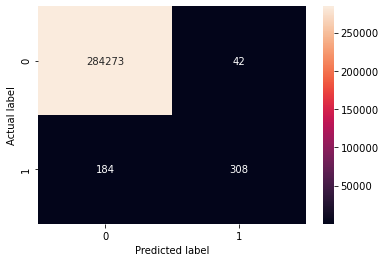

In [84]:
conf_matrix = confusion_matrix(y,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = "d")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

We are dealing with a high imbalance dataset, when there are just a few cases of fraud that we want to predict. Considering that, the most important metric we want to check the performance is the recall, that is 308/492 = 0.62 or 62%. Although the result is not highly ideal, we can conclude the model is still performing well.

(183, 275, 3)


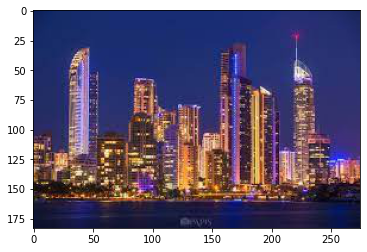

In [101]:
img = mpimg.imread('goldcoast.jpeg')
imgplot = plt.imshow(img)
print(format(img.shape))
plt.show()


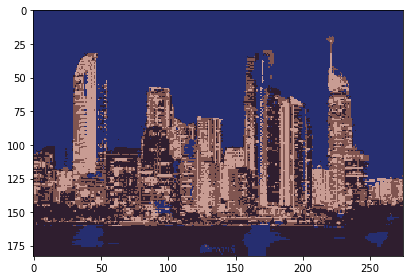

In [102]:

#Flatten the image
img_reshape = img.reshape(50325, 3)

#Implement k-means clustering to form 4 clusters
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
n_clusters=4, n_init=10,random_state=0, tol=0.0001, verbose=0)
kmeans.fit(img_reshape)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(183,275, 3)

#Save and display output image
io.imsave('compressed_image_4.jpeg', compressed_image)
io.imshow(compressed_image)
io.show()